In [1]:
from car import Car
from road import Road
from simulation import Simulation
import numpy as np
from unittest import mock
import matplotlib.pyplot as plt
#from statistics import mean, stdev as mean, stdev
import statistics as st

In [2]:
%matplotlib inline

In [3]:

def make_cars(num=10, slowing_chance=0.2, desired_speed=33.333, length=1000):
    road = Road(length=length)
    start_positions = list(np.linspace(length,0,num+1))[1:]
    cars = []
    for i in start_positions:
        car = Car(road, position=i, slowing_chance=slowing_chance, desired_speed=desired_speed) # reverse order required here...
        cars.append(car)
    return cars

In [4]:
def run_sim(cars, discard_steps=60, run_steps=300):
    sim = Simulation(cars=cars, steps=discard_steps)
    sim.start()
    sim.run()

    sim = Simulation(cars=cars, steps=run_steps)

    sim.start()
    positions, speeds = sim.run()
    return positions, speeds, speeds[:, 0].mean(), speeds[:, 0].std()

In [5]:
def plot_sim(title, cars, positions, speeds):
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title(title)
    for i in range(0, len(cars), 5):
        plt.scatter(range(len(positions)), positions[:,i], marker='_')#, speeds[:,i])
        plt.scatter(range(len(positions)), positions[:,i+1], c='r', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+2], c='g', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+3], c='y', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+4], c='m', marker='_')#, speeds[:,i+1], c='g')
        plt.subplots_adjust(left=2, right=4)
    avg = speeds[:, 0].mean()
    stdev = speeds[:, 0].std()
    print('mean: {} std: {}'.format(avg, stdev))
    return avg, stdev

In [6]:
def run_trial(num_trials=100, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=33.333, length=1000):
    data = []
    cars = []
    positions = []
    speeds = []
    for i in range(num_trials):
        cars = make_cars(num=num_cars, slowing_chance=slowing_chance, desired_speed=desired_speed)
        (positions, speeds, avg, stdev) = run_sim(cars=cars, discard_steps=discard_steps, run_steps=run_steps)
        data.append((positions, speeds, avg, stdev))
    
    plot_sim('{} cars, {}% slowing chance, {} m/s desired speed'.format(
            num_cars, slowing_chance*100, desired_speed),
            cars, positions, speeds
            )
    return data

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 100;

<IPython.core.display.Javascript object>

mean: 29.57123809523809 std: 5.236238634606787


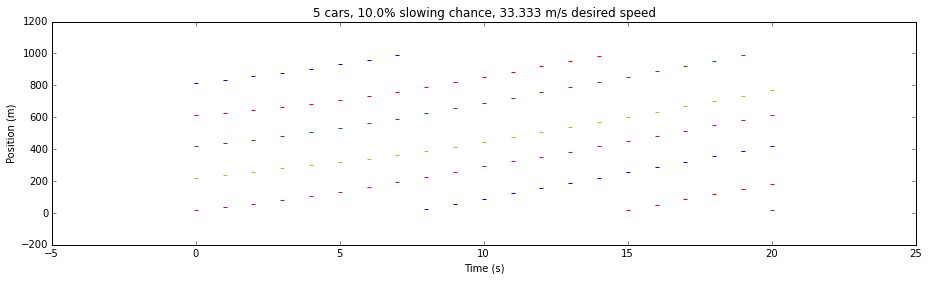

In [8]:
data = run_trial(num_trials=2, discard_steps=0, run_steps=20, num_cars=5,
              slowing_chance=0.1, desired_speed=33.333, length=1000)

In [9]:
# data

In [10]:
means, stdevs = [i[2] for i in data], [i[3] for i in data]

In [11]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 29.618857142857138, St Dev: 0.03474370326531349


mean: 25.59529508196722 std: 5.303576397248486


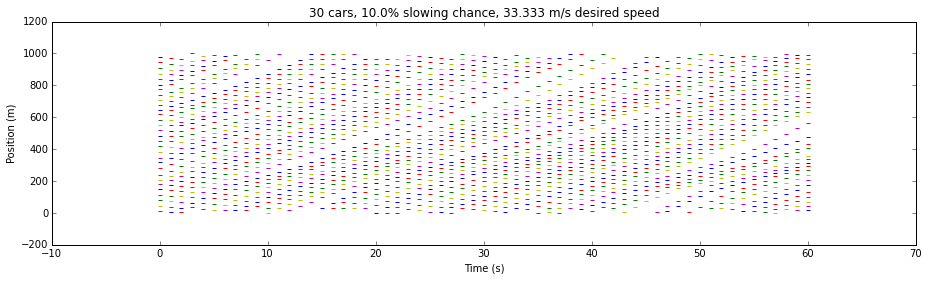

In [12]:
data = run_trial(num_trials=2, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=33.333, length=1000)
means, stdevs = [i[2] for i in data], [i[3] for i in data]


In [13]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 24.94241803278689, St Dev: 1.0268494644153596


mean: 27.9450655737705 std: 5.927655428661992
id#3371 Stopping
mean: 22.792327868852457 std: 5.8212735430482745
mean: 24.18572131147541 std: 5.0174311242175635
mean: 24.21824590163935 std: 6.66308243701691
1 loops, best of 3: 1.29 s per loop


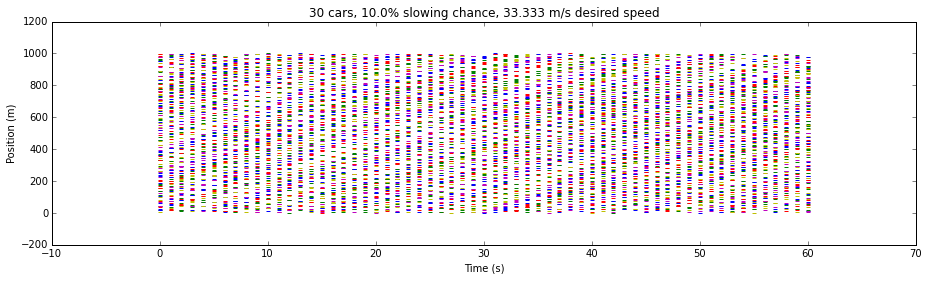

In [21]:
%%timeit
data = run_trial(num_trials=20, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=33.333, length=1000)
means, stdevs = [i[2] for i in data], [i[3] for i in data]


In [22]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 25.680231147540987, St Dev: 1.1497959587616775


id#5914 Stopping
id#6478 Stopping
id#6479 Stopping
id#6480 Stopping
mean: 25.496934426229515 std: 4.808395417132763


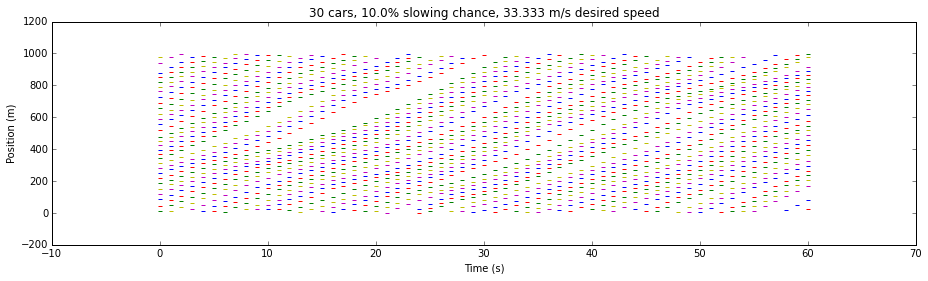

In [23]:
data = run_trial(num_trials=100, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=33.333, length=1000)
means, stdevs = [i[2] for i in data], [i[3] for i in data]

In [24]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 25.51449918032787, St Dev: 1.4463732051138605


###According to this simulation, the recommended speed would be ~25.5 + 1.45 ==> 27 m/s, so let's try that as the desired speed, and see what happens

id#17222 Stopping
id#17223 Stopping
id#17226 Stopping
id#17227 Stopping
mean: 25.295081967213115 std: 2.256823985488921


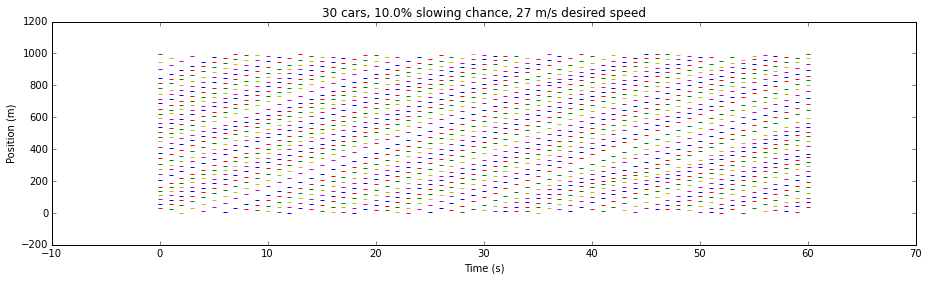

In [32]:
data = run_trial(num_trials=100, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=27, length=1000)
means, stdevs = [i[2] for i in data], [i[3] for i in data]

In [33]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 24.5172131147541, St Dev: 1.4855152235034523
